# Model Development

<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
</head>
<body>
    <h1>Introduction</h1>
    <p>
        In this project, I explore various regression techniques to model the data effectively and evaluate their performance using both visual and numerical methods. 
        The workflow includes linear regression, multiple linear regression, and polynomial regression. The evaluation process leverages three visualization methods 
        and statistical metrics such as R-squared and Mean Squared Error (MSE). The key techniques involved in this project are as follows:
    </p>
    <ul>
        <li><b>Creating single and multiple linear regression models</b>: To fit linear relationships in the data.</li>
        <li><b>Using visualization methods</b>: Applying tools such as <code>regplot()</code>, <code>residplot()</code>, and <code>distplot()</code> 
            to analyze and evaluate model performance visually.</li>
        <li><b>Developing polynomial regression models</b>: For data patterns that cannot be captured by linear models.</li>
        <li><b>Utilizing pipelines</b>: To simplify and streamline data preprocessing and model building steps.</li>
        <li><b>Evaluating models using numerical metrics</b>: Adopting statistical measures like R-squared and Mean Squared Error (MSE) to compare the performance of different models quantitatively.</li>
    </ul>
</body>
</html>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"
df = pd.read_csv(path)
df.head(10)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
5,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,...,8.5,110.0,5500.0,19,25,15250.0,12.368421,Medium,0,1
6,1,158,audi,std,four,sedan,fwd,front,105.8,0.925997,...,8.5,110.0,5500.0,19,25,17710.0,12.368421,Medium,0,1
7,1,122,audi,std,four,wagon,fwd,front,105.8,0.925997,...,8.5,110.0,5500.0,19,25,18920.0,12.368421,Medium,0,1
8,1,158,audi,turbo,four,sedan,fwd,front,105.8,0.925997,...,8.3,140.0,5500.0,17,20,23875.0,13.823529,Medium,0,1
9,2,192,bmw,std,two,sedan,rwd,front,101.2,0.849592,...,8.8,101.0,5800.0,23,29,16430.0,10.217391,Low,0,1


# 1.Linear Regression

In [3]:
from sklearn.linear_model import LinearRegression # load the model

In [4]:
lm = LinearRegression() #create a linear regression object
lm

LinearRegression()

In [5]:
X = df[["highway-mpg"]]
Y = df[["price"]]

In [6]:
lm.fit(X,Y)

LinearRegression()

In [7]:
Yhat = lm.predict(X)
Yhat[0:5] # input X in first five rows into the equation 

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

Yhat = a + bx

In [8]:
lm.intercept_ # value of a 

array([38423.30585816])

In [9]:
lm.coef_ # value of b

array([[-821.73337832]])

### Final Model:Price = 38423.31 - 821.73 x highway-mpg

test 1-3

In [10]:
new_array = np.array([[1],[2],[3]]) # 2d array
Yhat_new = lm.predict(new_array)
print("Predictions for x = 1 to x = 3:", Yhat_new)

Predictions for x = 1 to x = 3: [[37601.57247984]
 [36779.83910151]
 [35958.10572319]]


## Develop a single linear model between engine-size and price

In [11]:
pd.set_option('display.max_columns', None)
df.head(10)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
5,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,0.920833,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0,12.368421,Medium,0,1
6,1,158,audi,std,four,sedan,fwd,front,105.8,0.925997,0.991667,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0,12.368421,Medium,0,1
7,1,122,audi,std,four,wagon,fwd,front,105.8,0.925997,0.991667,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0,12.368421,Medium,0,1
8,1,158,audi,turbo,four,sedan,fwd,front,105.8,0.925997,0.991667,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0,13.823529,Medium,0,1
9,2,192,bmw,std,two,sedan,rwd,front,101.2,0.849592,0.900000,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16430.0,10.217391,Low,0,1


In [12]:
lm_engine = LinearRegression()

In [13]:
X = df[["engine-size"]]
Y = df[["price"]]

In [14]:
lm_engine.fit(X,Y)  

LinearRegression()

In [15]:
y_hat_engine = lm_engine.predict(X)
y_hat_engine[0:5]

array([[13728.4631336 ],
       [13728.4631336 ],
       [17399.38347881],
       [10224.40280408],
       [14729.62322775]])

In [16]:
lm_engine.intercept_

array([-7963.33890628])

In [17]:
lm_engine.coef_

array([[166.86001569]])

### Final Model:Price = -7963.33890628  + 166.86001569 x engine_size

# 2. Multiple Linear Regression

Using folowing variables as the predictor for car price.
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>

In [18]:
Z = df[["horsepower", "curb-weight", "engine-size", "highway-mpg"]]
lm.fit(Z, df["price"])

LinearRegression()

In [19]:
y_hat_multi = lm.predict(Z)
y_hat_multi[0:5]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211])

In [20]:
lm.intercept_

-15806.62462632923

In [21]:
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

<b>Price</b> = -15678.742628061467 + 53.49574423 x <b>horsepower</b> + 4.70770099 x <b>curb-weight</b> + 81.53026382 x <b>engine-size</b> + 36.05748882 x <b>highway-mpg</b>

# 3. Model Evaluation Using Visualization 

## Regression Plot

Draw a regreesion plot to demostrate the relationship between highway-mpg and price

(0.0, 48267.74579313242)

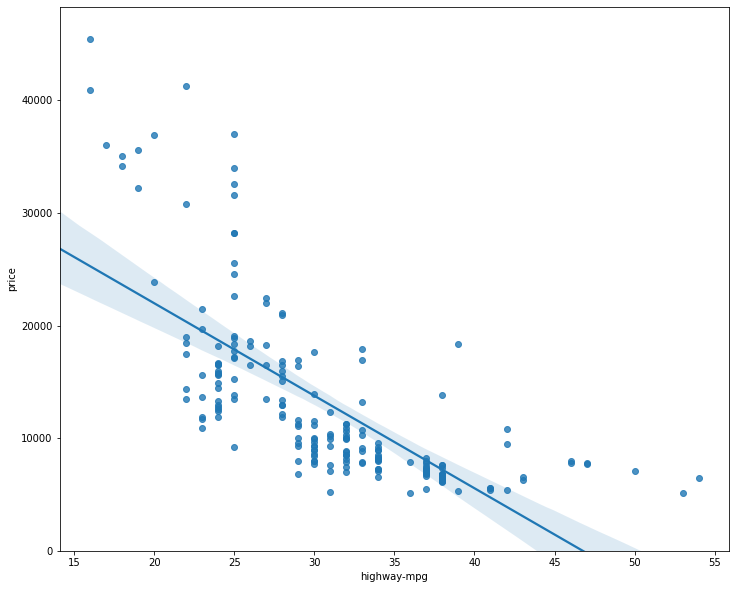

In [22]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x = df["highway-mpg"], y = df["price"], data = df)
plt.ylim(0,)

Draw a regreesion plot to demostrate the relationship between peak-rpm and price

(0.0, 47414.1)

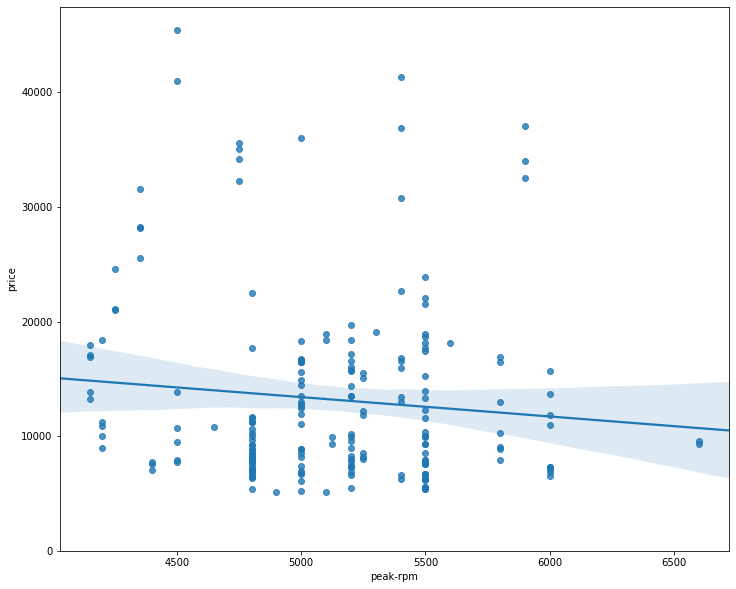

In [24]:
plt.figure(figsize = (width, height))
sns.regplot(x = df["peak-rpm"], y = df["price"], data = df)
plt.ylim(0,)

<p>Comparing the regression plot of "peak-rpm" and "highway-mpg", we see that the points for "highway-mpg" are much closer to the generated line and, on average, decrease. The points for "peak-rpm" have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" increases.</p>

In [25]:
df[["highway-mpg", "peak-rpm", "price"]].corr()

,highway-mpg,peak-rpm,price
highway-mpg,1.000000,-0.058598,-0.704692
peak-rpm,-0.058598,1.000000,-0.101616
price,-0.704692,-0.101616,1.000000


The variable "highway-mpg" has a stronger correlation with "price", it is approximate -0.704692  compared to "peak-rpm" which is approximate -0.101616.

In [26]:
from scipy import stats

In [27]:
pearson_coef, p = stats.pearsonr(df["highway-mpg"], df["price"])
print("coefficient is", pearson_coef)
print("p is", p)

coefficient is -0.704692265058953
p is 1.7495471144476358e-31


In [28]:
pearson_coef, p = stats.pearsonr(df["peak-rpm"], df["price"])
print("coefficient is", pearson_coef)
print("p is", p)

coefficient is -0.10161587407588148
p is 0.1511769165144532


## Residual Plot

A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

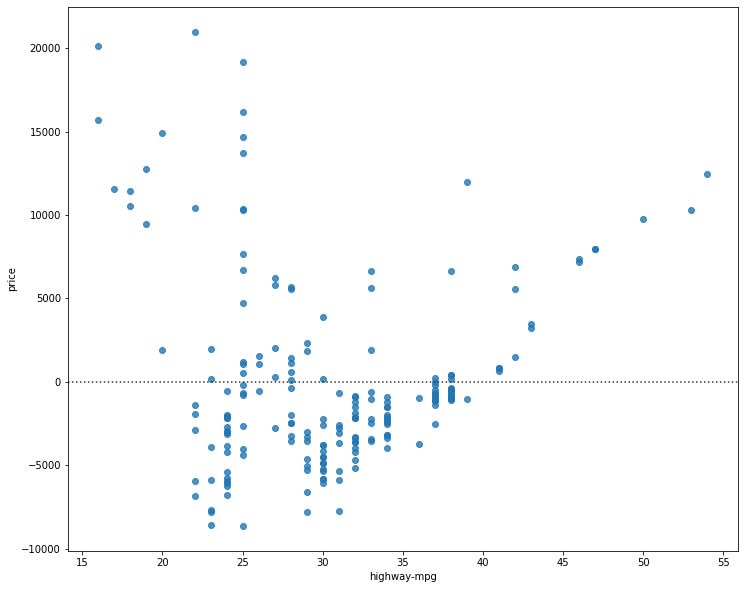

In [29]:
width = 12
height = 10
plt.figure(figsize = (width, height))
sns.residplot(x = df["highway-mpg"], y = df["price"], data = df)

This residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.

## Distribution Plot for Mulitiple Linear Regression 

In [30]:
y_hat_multi = lm.predict(Z)

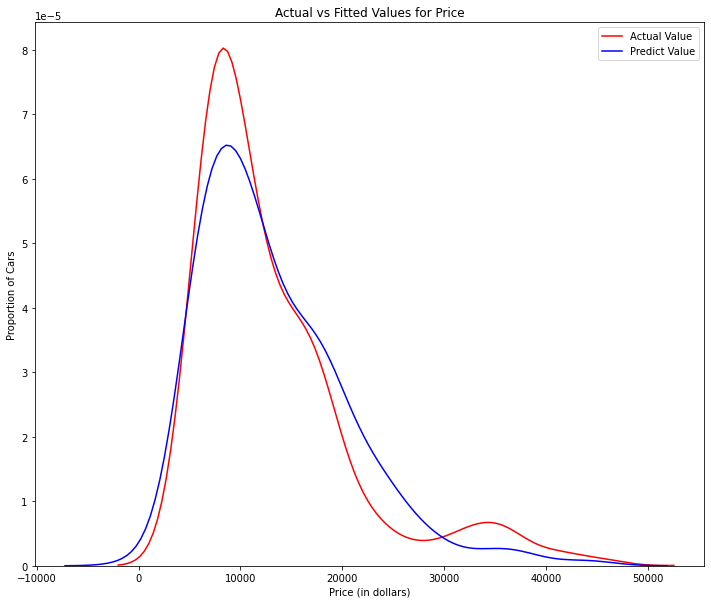

In [31]:
plt.figure(figsize = (width, height))

ax1 = sns.distplot(df["price"], hist = False, color = 'r', label = "Actual Value")
sns.distplot(y_hat_multi, hist = False, color = 'blue', label = "Predict Value", ax = ax1)

plt.title("Actual vs Fitted Values for Price")
plt.xlabel("Price (in dollars)")
plt.ylabel("Proportion of Cars")

plt.show()
plt.close()

<p>We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.</p>

# 4. Polynomian Regression and Pipelines

Using polynomian regression for highway-mpg and price

In [32]:
x = df["highway-mpg"]
y = df["price"]

In [33]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


plot data

In [34]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100) #highway-mpg range from 16-54
    y_new = model(x_new) # get value by using polynomian model

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-') # '.': scatter plot, '-': smoothy line
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca() #get current axis
    ax.set_facecolor((0.898, 0.898, 0.898)) #set background color to light grey
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

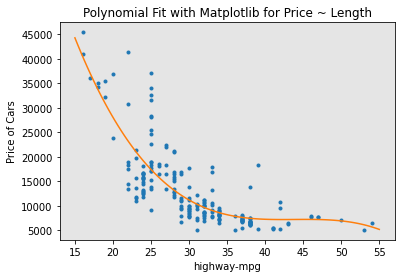

In [35]:
PlotPolly(p, x, y, 'highway-mpg')

In [36]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

## y = −1.55663829x<sup>3</sup> + 204.754306x<sup>2</sup> −8965.43312x + 137923.594

In [37]:
highway_min = df["highway-mpg"].max()
highway_max = df["highway-mpg"].min()
print("min:", highway_min)
print("max:", highway_max)

min: 54
max: 16


create 11 order polynomian regression from above

In [38]:
f11 = np.polyfit(x, y, 11)
p11 = np.poly1d(f11)
print(p11)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


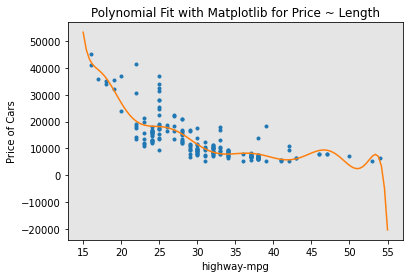

In [39]:
PlotPolly(p11, x, y, 'highway-mpg')

## Perform a polynomial transform on multiple features

In [40]:
from sklearn.preprocessing import PolynomialFeatures

In [41]:
pr = PolynomialFeatures(degree = 2)
pr

PolynomialFeatures()

In [42]:
Z_pr = pr.fit_transform(Z)

In [43]:
Z.shape

(201, 4)

In [44]:
Z_pr.shape

(201, 15)

## Pipeline

<p>Data Pipelines simplify the steps of processing the data. We use the module <b>Pipeline</b> to create a pipeline. We also use <b>StandardScaler</b> as a step in our pipeline.</p>

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.

In [46]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
# StandardScaler(): standardizes features to ensures they have the same scale

We input the list as an argument to the pipeline constructor:

In [47]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

First, we convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.

Then, we can normalize the data, perform a transform and fit the model simultaneously.

In [107]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously.

In [109]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [110]:
df.head(10)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
5,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,0.920833,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0,12.368421,Medium,0,1
6,1,158,audi,std,four,sedan,fwd,front,105.8,0.925997,0.991667,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0,12.368421,Medium,0,1
7,1,122,audi,std,four,wagon,fwd,front,105.8,0.925997,0.991667,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0,12.368421,Medium,0,1
8,1,158,audi,turbo,four,sedan,fwd,front,105.8,0.925997,0.991667,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0,13.823529,Medium,0,1
9,2,192,bmw,std,two,sedan,rwd,front,101.2,0.849592,0.900000,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16430.0,10.217391,Low,0,1


## Create a pipe line for linear regression

In [55]:
Input = [("scale", StandardScaler()), ("model", LinearRegression())]
pipe = Pipeline(Input)

pipe.fit(Z,y)

y_pipe = pipe.predict(Z)
y_pipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

# 5. Measure for In-Sample Evaluation

<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>

## Linear Regression

R-squared

In [62]:
# X:engine-size, Y:price
lm.fit(X,Y)
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.7609686443622008


We can say that ~76.096% of the variation of the price is explained by this simple linear model "engien-size".

MSE

In [67]:
from sklearn.metrics import mean_squared_error
print("The MSE is:", mean_squared_error(df["price"], y_hat_engine))

The MSE is: 15021126.02517414


## Multiple Linear Regression

R-squared

In [69]:
# Z: "horsepower", "curb-weight", "engine-size", "highway-mpg"
lm.fit(Z, df["price"])
print("The R square is:", lm.score(Z, df["price"]))

The R square is: 0.8093562806577457


We can say that ~80.935 % of the variation of price is explained by this multiple linear regression "lm.fit".

MSE

In [71]:
print("The MSE is:", mean_squared_error(df["price"], y_hat_multi))

The MSE is: 11980366.87072649


## Polynomial Fit

In [72]:
from sklearn.metrics import r2_score

R-squared

In [74]:
# p: highway-mpg
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


MSE

In [76]:
print('The R-square value is: ', mean_squared_error(df['price'], p(x)))

The R-square value is:  20474146.426361218


# 6. Prediction and Decision Making

In [104]:
new_input = np.arange(100,200,1).reshape(-1,1)

array([129])

In [99]:
# X:engine-size,Y:price
lm.fit(X, Y)
lm

LinearRegression()

In [101]:
new_engine = lm.predict(new_input)

In [105]:
new_engine[30] #predict price when engine-size = 130 

array([13728.4631336])

In [87]:
df.head(10)

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1
5,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,0.920833,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0,12.368421,Medium,0,1
6,1,158,audi,std,four,sedan,fwd,front,105.8,0.925997,0.991667,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0,12.368421,Medium,0,1
7,1,122,audi,std,four,wagon,fwd,front,105.8,0.925997,0.991667,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0,12.368421,Medium,0,1
8,1,158,audi,turbo,four,sedan,fwd,front,105.8,0.925997,0.991667,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0,13.823529,Medium,0,1
9,2,192,bmw,std,two,sedan,rwd,front,101.2,0.849592,0.900000,54.3,2395,ohc,four,108,mpfi,3.50,2.80,8.8,101.0,5800.0,23,29,16430.0,10.217391,Low,0,1


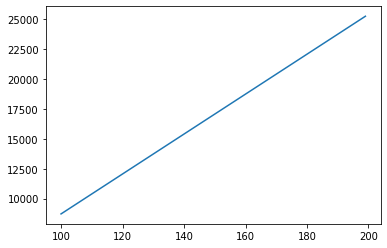

In [106]:
plt.plot(new_input, new_engine)
plt.show()